# Advanced use case

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_error_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### Imports

In [ ]:
from dolphin.processor import Processor
from dolphin.analysis.output import Output

import matplotlib.pyplot as plt
import numpy as np

### create a `Processor` instance and point to the IO directory

In [1]:
processor = Processor("../io_directory_example/")

### Run a model by calling the  `swim()` method

In [2]:
processor.swim(lens_name="lens_system3", model_id="example", log=False)

{'joint_source_with_source': [], 'joint_lens_light_with_lens_light': [], 'joint_source_with_point_source': [[0, 0]], 'joint_lens_with_light': [], 'num_point_source_list': [4], 'solver_type': 'PROFILE_SHEAR'}
Computing the PSO ...


/Users/ajshajib/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ajshajib/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


10
20
30
40
50
Max iteration reached! Stopping.
-1.7349340671502214 reduced X^2 of best position
-12468.97114060864 logL
14374 effective number of data points
[{'theta_E': 0.703819905449974, 'gamma': 2.0, 'e1': -0.026116306140966973, 'e2': 0.06037110817560824, 'center_x': -0.1511150937326546, 'center_y': 0.0659741182595929}, {'gamma_ext': 0.0021237990388858394, 'psi_ext': -100.73651012463311, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.18189921237829682, 'n_sersic': 6.287991770564359, 'e1': 0.18158069344362068, 'e2': 0.20323661468113347, 'center_x': -0.14157309774791405, 'center_y': 0.0759951135262128}] source result
[{'amp': 1, 'R_sersic': 0.5155295565657643, 'n_sersic': 0.5170140859306926, 'e1': 0.3646361189082643, 'e2': -0.37954821164529423, 'center_x': 0.08871010963325096, 'center_y': -0.10691053587988122}] lens light result
[{'ra_image': array([-0.53698258, -0.68934525,  0.21783237,  0.54585215]), 'dec_image': array([-0.48515624,  0.54068628,  0.65925007, -0.1351

/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Sampling/Samplers/pso.py:270: RuntimeWarning: invalid value encountered in double_scalars
  return abs(self.global_best.fitness - mean_fit) < m


10
20
30
40
50
Max iteration reached! Stopping.
-1.709225516213699 reduced X^2 of best position
-12284.203785027854 logL
14374 effective number of data points
[{'theta_E': 0.7045969824347617, 'gamma': 2.0, 'e1': -0.024824010229097054, 'e2': 0.05644405251899724, 'center_x': -0.14760169991982633, 'center_y': 0.06489547974016474}, {'gamma_ext': 0.0021365189654677496, 'psi_ext': 2.9068238929160133, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.18172204906906825, 'n_sersic': 6.294978555693188, 'e1': 0.1791437764397973, 'e2': 0.20203664276821098, 'center_x': -0.1384128284396103, 'center_y': 0.07393485192526564}] source result
[{'amp': 1, 'R_sersic': 0.5393517555436635, 'n_sersic': 0.5012449676523942, 'e1': 0.33300529357810454, 'e2': -0.3904027716749496, 'center_x': 0.08932362900996645, 'center_y': -0.10697917092435913}] lens light result
[{'ra_image': array([-0.53593263, -0.68626712,  0.2149548 ,  0.54719789]), 'dec_image': array([-0.48793421,  0.53851706,  0.66323496, -0.142

## Let's check the output

In [3]:
output = Output("../io_directory_example/")

-1.587556037065925 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  1.587556037065925


/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:82: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',


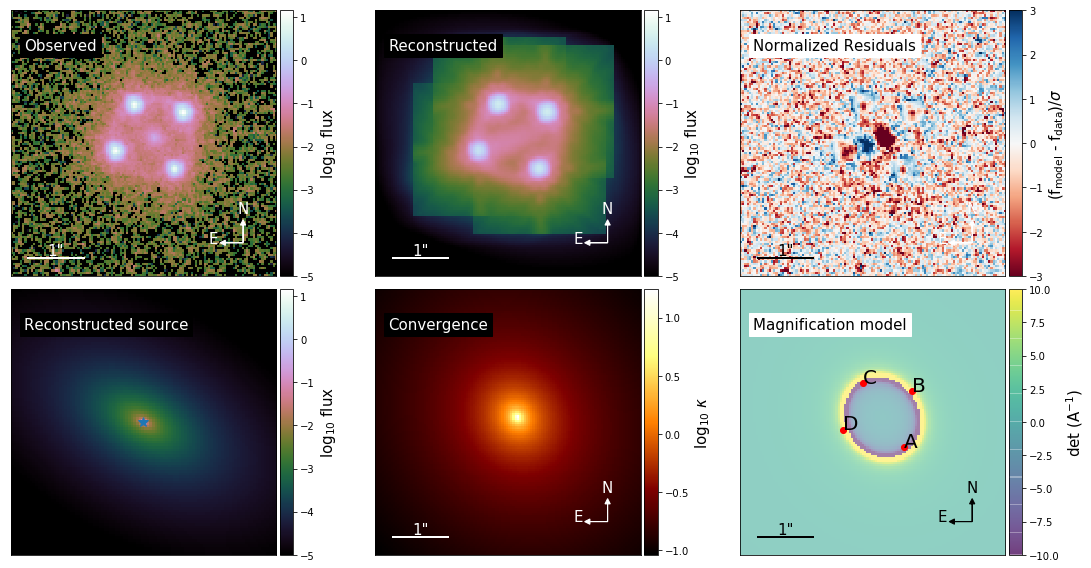

In [4]:
fig = output.plot_model_overview(lens_name="lens_system3", model_id="example")

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [5]:
output.get_kwargs_data_joint("lens_system3")

{'multi_band_list': [[{'background_rms': 0.005410915240645,
    'dec_at_xy_0': -2.399111017814023,
    'exposure_time': array([[697.0825 , 503.49606, 679.8957 , ..., 934.47833, 959.3858 ,
            956.0639 ],
           [940.014  , 695.45166, 615.2481 , ..., 620.5439 , 962.6702 ,
            741.8869 ],
           [800.86237, 923.98846, 628.4555 , ..., 790.8768 , 964.92914,
            933.5784 ],
           ...,
           [960.678  , 958.5928 , 962.2539 , ..., 961.1977 , 963.7092 ,
            956.88763],
           [951.48285, 955.8999 , 964.3244 , ..., 959.7375 , 960.80963,
            961.0066 ],
           [605.2956 , 920.7195 , 952.1291 , ..., 964.6863 , 956.1972 ,
            957.31537]], dtype=float32),
    'image_data': array([[ 4.3253470e-03, -2.5759672e-03, -2.8244085e-03, ...,
             6.6894642e-04, -1.6578455e-03, -1.1933473e-04],
           [-2.3312846e-03,  2.5787833e-03,  8.7178568e-04, ...,
             3.5077034e-04,  5.7318993e-03, -4.9318239e-04],
         

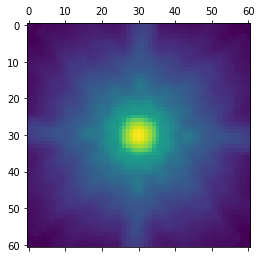

In [6]:
plt.matshow(
    np.log10(
        output.get_kwargs_data_joint("lens_system3")["multi_band_list"][0][1][
            "kernel_point_source"
        ]
    )
)

In [7]:
output.load_output(lens_name="lens_system3", model_id="example")

output.kwargs_result

{'kwargs_lens': [{'theta_E': 0.7045969824347617,
   'gamma': 2.0101713331411153,
   'e1': -0.024824010229097054,
   'e2': 0.05644405251899724,
   'center_x': -0.14760169991982633,
   'center_y': 0.06489547974016474},
  {'gamma_ext': 0.0024853202483729802,
   'psi_ext': 2.921638827780766,
   'ra_0': 0,
   'dec_0': 0}],
 'kwargs_source': [{'amp': 1,
   'R_sersic': 0.18280688229431252,
   'n_sersic': 6.412995374518211,
   'e1': 0.14199768083335942,
   'e2': 0.22418433920718656,
   'center_x': -0.13605697110070877,
   'center_y': 0.07605753621444368}],
 'kwargs_lens_light': [{'amp': 1,
   'R_sersic': 0.5765853458944391,
   'n_sersic': 0.5079856006255421,
   'e1': 0.4278911628595661,
   'e2': -0.3969172683580202,
   'center_x': 0.08777840929447987,
   'center_y': -0.023546244374546787}],
 'kwargs_ps': [{'ra_image': array([-0.542423  , -0.68992865,  0.19305271,  0.54925275]),
   'dec_image': array([-0.47801607,  0.5429725 ,  0.68249199, -0.15519532]),
   'point_amp': [1, 1, 1, 1]}],
 'kwargs

When necessary, the settings of the model run---that was read out of the 'config_{lens_name}.yml' file---can be accessed through the `output.model_settings` variable.

In [8]:
output.model_settings

{'system_name': 'lens_system3',
 'band': ['F814W'],
 'pixel_size': 0.04,
 'model': {'lens': ['SPEMD', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE'],
  'source_light': ['SERSIC_ELLIPSE'],
  'point_source': ['LENSED_POSITION']},
 'lens_option': {'centroid_init': [0.08, -0.16]},
 'point_source_option': {'ra_init': [-0.54406114,
   -0.72452976,
   0.19185123,
   0.53232042],
  'dec_init': [-0.52020092, 0.51973194, 0.64407066, -0.19580313],
  'bound': 0.5},
 'fitting': {'psf_iteration': False,
  'psf_iteration_settings': {'num_iter': 20,
   'psf_iter_factor': 0.5,
   'psf_symmetry': 4,
   'block_center_neighbour': 0.389},
  'pso': True,
  'pso_settings': {'num_particle': 40, 'num_iteration': 50},
  'sampling': False,
  'sampler': 'MCMC',
  'mcmc_settings': {'burnin_step': 100,
   'iteration_step': 100,
   'walker_ratio': 2}},
 'kwargs_numerics': {'supersampling_factor': [2]},
 'kwargs_constraints': {'num_point_source_list': [4],
  'solver_type': 'PROFILE_SHEAR'}}